In [9]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import random
import os

# File paths
TRAIN_DATADIR = '/home/kaushal/Datasets/DistractedDriverDetectionData/train/'
TEST_DATADIR = '/home/kaushal/Datasets/DistractedDriverDetectionData/test/'
TRAIN_DATA_NPY = './npy_arrays/train_data.npy'
TRAIN_DATA_COLOR_NPY = './npy_arrays/train_color_data.npy'
TEST_DATA_NPY = './npy_arrays/test_data.npy'
TEST_UNKNOWN = './datasets/testunknown'

# Categorical information
CATEGORIES = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
IMG_CATEGORIES = ['Safe Driving',
  'Texting Right' ,
  'Talking Right' , 
  'Texting Left ' ,
  'Talking Left ' ,
  'Adjust Radio/Music Player' , 
  'Drinking',
  'Reaching Behind', 
  'Hair and Makeup' , 
  'Talking to Passenger']

# Model information
IMG_SIZE = 128
LR = 1e-3
MODEL_NAME = 'Distracted_Driver_CNN' 
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    plt.imshow(img_array, cmap="gray")
    plt.show()
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0  # return the image with shaping that TF wants.

In [10]:
model = load_model('./assets/DDD.model/')

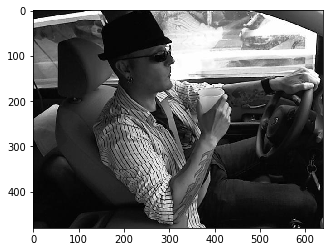

Prediction: Texting Right


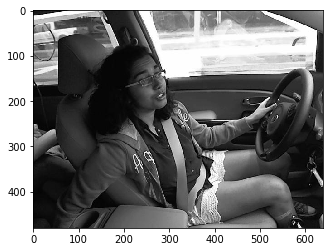

Prediction: Reaching Behind


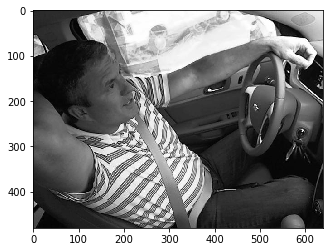

Prediction: Reaching Behind


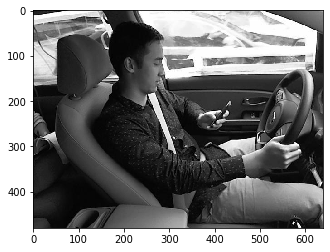

Prediction: Talking Left 


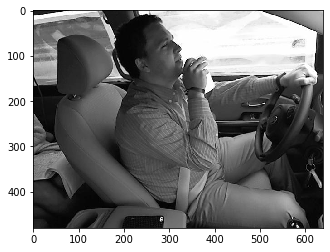

Prediction: Talking Left 


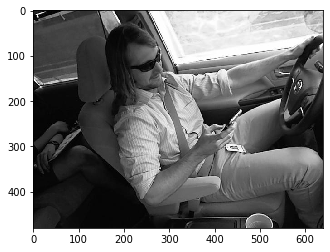

Prediction: Hair and Makeup


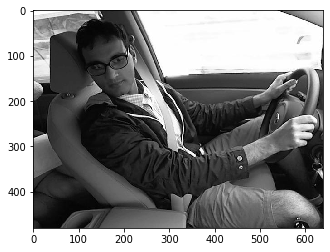

Prediction: Talking Left 


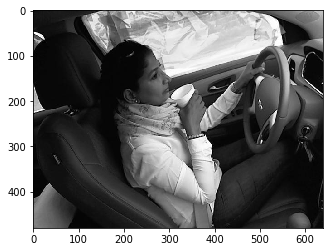

Prediction: Drinking


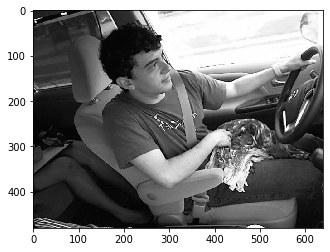

Prediction: Talking to Passenger


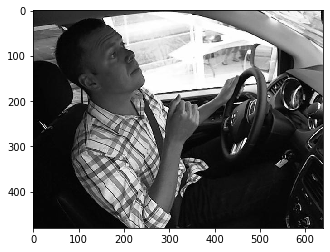

Prediction: Drinking


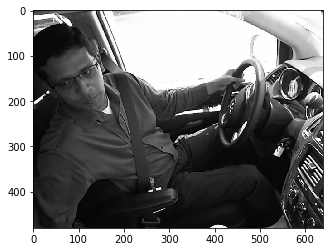

Prediction: Reaching Behind


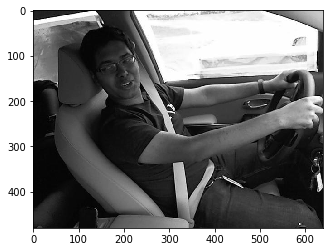

Prediction: Hair and Makeup


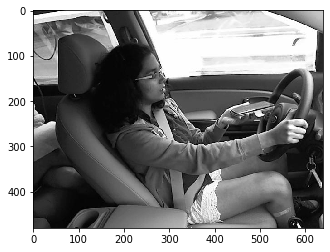

Prediction: Texting Left 


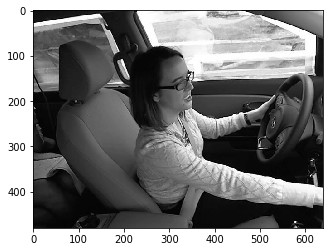

Prediction: Adjust Radio/Music Player


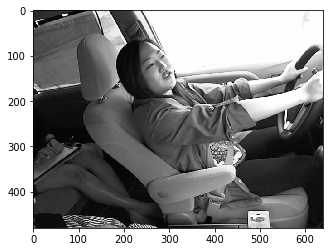

Prediction: Talking Left 


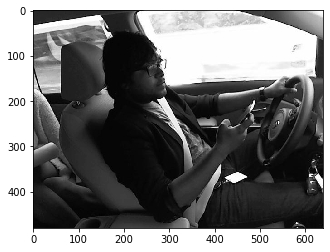

Prediction: Talking Right


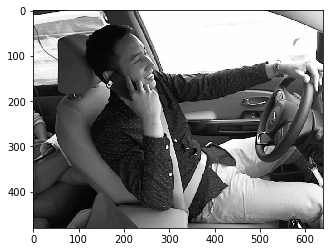

Prediction: Talking Left 


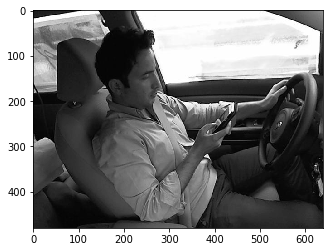

Prediction: Reaching Behind


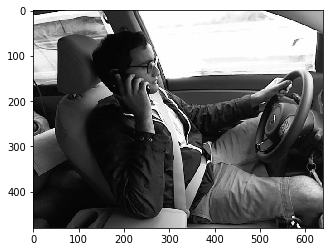

Prediction: Adjust Radio/Music Player


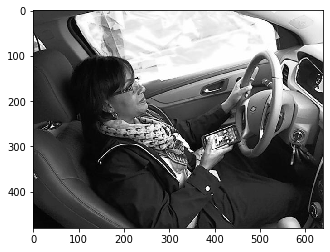

Prediction: Reaching Behind


In [11]:
for _ in range(20):
    img_path = '/home/kaushal/Datasets/DistractedDriverDetectionData/test/'
    img_path += random.choice(os.listdir(img_path))
    prediction = model.predict([prepare(img_path)])
    print("Prediction:", IMG_CATEGORIES[np.argmax(prediction)])